In [3]:
import tweepy
from tweepy import Stream
from textblob import TextBlob
import pandas as pd
import numpy as np
from tweepy import OAuthHandler
import re
import time
from tweepy.streaming import StreamListener
import io
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns

In [4]:
consumer_key = 'gvpKrODal9kI0nu7BMUyKIRbb'
consumer_key_secret = 'Ebv7e7mUbOBeOSOoujvIKUSc2CcvhWzmfikiocjsZApLXNtLre'
access_token = '1202118488-UimuEMCVJ9W10Y7hsPII3Sermi2cLMPC7ngdLDw'
access_token_secret = 'R6K05mffCi9K7nL23Ui4eidOXrJ0MTt7YfcPjtULogGGh'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [6]:
#importing data from tweepy API

search_term = 'not'
search_term2 = 'no'
search_term3 = 'ain\'t'
search_term4 = 'none'
public_tweets1 = api.search(q=search_term, count="100",tweet_mode="extended", lang="en")
time.sleep(0.5)
public_tweets1 += api.search(q=search_term2, count="100",tweet_mode="extended", lang="en")
time.sleep(0.5)
public_tweets1 += api.search(q=search_term3, count="100",tweet_mode="extended", lang="en")
time.sleep(0.5)
public_tweets1 += api.search(q=search_term4, count="100",tweet_mode="extended", lang="en")
time.sleep(0.5)
public_tweets = []

# Data pre-processing

# remove retweets
for tweet in public_tweets1:
    if(tweet.full_text.split(' ')[0].lower() == "rt"):
        continue
    public_tweets.append(tweet)
    
# remove user names and urls
for tweet in public_tweets:
    words = tweet.full_text.split()
    for word in words:
        if(word[0] == '@' or word[:3].lower() == "www" or word[:4].lower() == "http"):
            tweet.full_text = tweet.full_text.replace(word,'')

# remove special characters
for tweet in public_tweets:
    tweet.full_text = tweet.full_text.replace('\'','')
    tweet.full_text = re.sub("['\W+']",  " ", str(tweet.full_text))
    
#Remove additional white spaces
    tweet.full_text = re.sub('[\s]+', ' ', tweet.full_text)
    
#Convert to lower case
    tweet.full_text = tweet.full_text.lower()
    
#Replace #word with word
    tweet.full_text = re.sub(r'#([^\s]+)', r'\1',tweet.full_text)
    
#trim
    tweet.full_text = tweet.full_text.strip()

In [7]:
print ("Total tweets: " + str(len(public_tweets)))

Total tweets: 163


In [8]:
df= pd.DataFrame()

In [9]:
tweets_text=[]
tweets_sentiment=[]

In [10]:
# Analyzing tweet sentiment using TextBlob

for tweet in public_tweets:
    tweets_text.append(str(tweet.full_text))
    print(tweet.full_text)
    analysis = TextBlob(str(tweet.full_text))
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        print ('Positive')
        tweets_sentiment.append('positive')
    else:
        print ('Negative')
        tweets_sentiment.append('nagative')
    print("")
    


why not take time to find out about the russian report that would be a lot more interesting and might even be classed as journalism your current obsession is only of interest to yourself
Sentiment(polarity=0.2, subjectivity=0.48)
Positive

martin luther king jr hoped that his children will not be judged by the color of their skin but by the content of their character 1963 prophet muhammad stated that people are superior to others only by piety good action 632 1 331 years apart but kindred spirits
Sentiment(polarity=0.375, subjectivity=0.65)
Positive

is this the united nations that carries the poems of protecting peoples we did not see you protecting the iraqis from killing until the moment why do they stop you why are you silent are the iraqis not human beings
Sentiment(polarity=0.0, subjectivity=0.1)
Negative

are you not terrified to read it
Sentiment(polarity=0.0, subjectivity=0.0)
Negative

i want all loss paid by access bank plc cos i have lost so much jobs client could not do tr

Sentiment(polarity=0.16999999999999998, subjectivity=0.6599999999999999)
Positive

i think he meant no credible government
Sentiment(polarity=-0.2, subjectivity=0.7)
Negative

there was no other option prince harry speaks about royal exit
Sentiment(polarity=0.0625, subjectivity=0.375)
Positive

stock market means nothing to people with no health insurance preexisting conditions two jobs no vacation living paycheck to paycheck stock market is for corporate wealthy who benefited from your tax cut which did not help the middle class
Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)
Positive

what he needs to be watched because he told them that the nazis used the excuse that they were just doing their jobs when they murdered jews the very same thing these guys said they were doing the same thing that the democrats r ding to trump no crime suspicion is guilt
Sentiment(polarity=-0.016666666666666666, subjectivity=0.1125)
Negative

so first it was shes trying to reap t

Sentiment(polarity=-0.32, subjectivity=0.62)
Negative

wwe and aew aint paying none of yall for your suspended accounts on here but you keep fighting the good fight against each other do your thing lovelies
Sentiment(polarity=0.2875, subjectivity=0.48750000000000004)
Positive

whats the purpose of flwrs if u basically hve none 2 talk to
Sentiment(polarity=0.0, subjectivity=0.0)
Negative

ima drag you by your hair if i gotta but we ain t doing none of that no ma am
Sentiment(polarity=-0.1, subjectivity=0.07083333333333333)
Negative

all about the money all the cash none of the associated stress
Sentiment(polarity=0.0, subjectivity=0.0)
Negative

none of them they cant go unbeaten city will beat them in return leg neither can they win treble cl pl amp fa cup
Sentiment(polarity=0.8, subjectivity=0.4)
Positive

so none of my children got the lesson feel like a very shit teacher maybe i m not good enough for teaching
Sentiment(polarity=-0.20333333333333334, subjectivity=0.7000000000000001)


In [11]:
df['Tweets']=tweets_text
df['Sentiment']= tweets_sentiment

In [12]:
df

,Tweets,Sentiment
0,why not take time to find out about the russia...,positive
1,martin luther king jr hoped that his children ...,positive
2,is this the united nations that carries the po...,nagative
3,are you not terrified to read it,nagative
4,i want all loss paid by access bank plc cos i ...,positive
5,my father does not allow me to go to four corners,nagative
6,if the value of a thing is not known abuse is ...,positive
7,the danger of small mistakes is that those mis...,nagative
8,shall not be infringed,nagative
9,stock market means nothing to people with no h...,positive


In [13]:
# Count Positive and Negatives

positives = df['Sentiment'][df.Sentiment == 'positive']
negatives = df['Sentiment'][df.Sentiment == 'nagative']

print('Positve tagged sentences are:  {}'.format(len(positives)))
print('Negative tagged sentences are: {}'.format(len(negatives)))
print('total number of the tweets is:  {}'.format(df.shape[0]))

Positve tagged sentences are:  65
Negative tagged sentences are: 98
total number of the tweets is:  163


In [14]:
df['Tweets']

0      why not take time to find out about the russia...
1      martin luther king jr hoped that his children ...
2      is this the united nations that carries the po...
3                       are you not terrified to read it
4      i want all loss paid by access bank plc cos i ...
5      my father does not allow me to go to four corners
6      if the value of a thing is not known abuse is ...
7      the danger of small mistakes is that those mis...
8                                 shall not be infringed
9      stock market means nothing to people with no h...
10              5 things you might not know about heroin
11     and he was the lt gov of delhi he has not read...
12     also i finished the first season of star align...
13     please don t bother to ask me if i am okay or ...
14     twitter when im in home not nsfw twitter when ...
15     more than half of secondary teachers who claim...
16                                  its not hina its sam
17     sore wa chigau yo youve 

In [15]:
# remove empty rows

df = df[pd.notnull(df['Tweets'])]

In [16]:
# Creating an array of tweet strings

tweets_words =list(df['Tweets'])
len_words=[]
for twet in tweets_words:
    len_words.append(len(str.split(twet)))
    
df['total_words']=len_words

In [17]:
df

,Tweets,Sentiment,total_words
0,why not take time to find out about the russia...,positive,34
1,martin luther king jr hoped that his children ...,positive,48
2,is this the united nations that carries the po...,nagative,40
3,are you not terrified to read it,nagative,7
4,i want all loss paid by access bank plc cos i ...,positive,27
5,my father does not allow me to go to four corners,nagative,11
6,if the value of a thing is not known abuse is ...,positive,20
7,the danger of small mistakes is that those mis...,nagative,13
8,shall not be infringed,nagative,4
9,stock market means nothing to people with no h...,positive,39


In [18]:
# Checking double negation

negations_dic = ["isn t","isnt","not","don t","dont","aren t","arent", "wasn t","wasnt", "weren t","werent",
                "haven t", "havent","hasn t","hasnt","hadn t","hadnt","won t","wont",
                "wouldn t","wouldnt", "doesn t","doesnt","didn t","didnt",
                "can t","cant","couldn t", "none","couldnt","shouldn t","shouldnt","mightn t","mightnt",
                "mustn t","mustnt","aint", "ain t", "never"]
print (negations_dic)

#feature engineering - identifying features in sentence which make it double negative (dictonary)

negation_pairs = ["aint no", "ain t no", "havent had no", "haven t had no","can t do no", "cant do no", "aint got no", "ain t got no", "aint nobody", "ain t nobody", "wont do you no", "won t do you no", "cant see no", "can t see no", "arent no", "aren t no", "didnt have none", "didn t have none", "cant find no", "can t find no", "dont have no","don t have no", "wont get you nowhere", "won t get you nowhere", "didnt see nothing", "didn t see nothing", "not irr", "not non", "wasnt no", "wasn t no", "not un", "havent no", "haven t no", "cant no", "can t no", "wont no", "won t no", "cant get no", "can t get no", "wasnt irr", "wasn t irr", "didnt have none", "didn t have none"]
print (negation_pairs)

['isn t', 'isnt', 'not', 'don t', 'dont', 'aren t', 'arent', 'wasn t', 'wasnt', 'weren t', 'werent', 'haven t', 'havent', 'hasn t', 'hasnt', 'hadn t', 'hadnt', 'won t', 'wont', 'wouldn t', 'wouldnt', 'doesn t', 'doesnt', 'didn t', 'didnt', 'can t', 'cant', 'couldn t', 'none', 'couldnt', 'shouldn t', 'shouldnt', 'mightn t', 'mightnt', 'mustn t', 'mustnt', 'aint', 'ain t', 'never']
['aint no', 'ain t no', 'havent had no', 'haven t had no', 'can t do no', 'cant do no', 'aint got no', 'ain t got no', 'aint nobody', 'ain t nobody', 'wont do you no', 'won t do you no', 'cant see no', 'can t see no', 'arent no', 'aren t no', 'didnt have none', 'didn t have none', 'cant find no', 'can t find no', 'dont have no', 'don t have no', 'wont get you nowhere', 'won t get you nowhere', 'didnt see nothing', 'didn t see nothing', 'not irr', 'not non', 'wasnt no', 'wasn t no', 'not un', 'havent no', 'haven t no', 'cant no', 'can t no', 'wont no', 'won t no', 'cant get no', 'can t get no', 'wasnt irr', 'wa

As we have identified the negative and positive tweets, now we need to see how much(count) negative these tweets have.

In [20]:
df1 = df
df1['Tweets']=df1['Tweets'].str.lower()
tweets_words =list(df1['Tweets'])
count=0
count_list=[]

# counting number of negative words

for twt in tweets_words:
    count=0
    print(twt)
    for neg in negations_dic:
        if neg in twt:
            print(neg)
            count=count+1 
    count_list.append(count)
    print(count)
    count=0

why not take time to find out about the russian report that would be a lot more interesting and might even be classed as journalism your current obsession is only of interest to yourself
not
1
martin luther king jr hoped that his children will not be judged by the color of their skin but by the content of their character 1963 prophet muhammad stated that people are superior to others only by piety good action 632 1 331 years apart but kindred spirits
not
1
is this the united nations that carries the poems of protecting peoples we did not see you protecting the iraqis from killing until the moment why do they stop you why are you silent are the iraqis not human beings
not
1
are you not terrified to read it
not
1
i want all loss paid by access bank plc cos i have lost so much jobs client could not do transactions with me because of my account
not
1
my father does not allow me to go to four corners
not
1
if the value of a thing is not known abuse is inevitable know your worth and add tax 

In [21]:
# Adding count of negative words in Dataframe

df1['negative_words']=count_list

In [22]:
df1

,Tweets,Sentiment,total_words,negative_words
0,why not take time to find out about the russia...,positive,34,1
1,martin luther king jr hoped that his children ...,positive,48,1
2,is this the united nations that carries the po...,nagative,40,1
3,are you not terrified to read it,nagative,7,1
4,i want all loss paid by access bank plc cos i ...,positive,27,1
5,my father does not allow me to go to four corners,nagative,11,1
6,if the value of a thing is not known abuse is ...,positive,20,1
7,the danger of small mistakes is that those mis...,nagative,13,1
8,shall not be infringed,nagative,4,1
9,stock market means nothing to people with no h...,positive,39,1


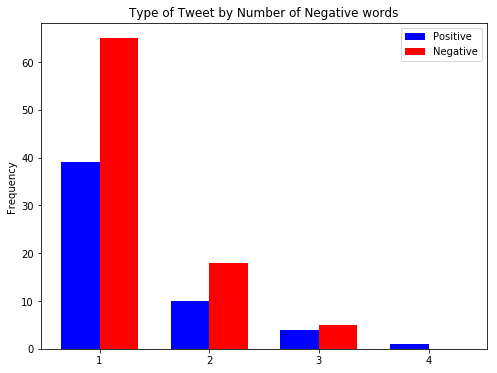

In [23]:
#plotting graph of type of tweet with number of negative words

nMax = max(df1["negative_words"])
xAxis = []
for x in range(nMax+1):
    if(x!=0):
        xAxis.append(x)
posCount = []
negCount = []
for x in range(nMax+1):
    if(x!=0):
        posCount.append(len(df1["total_words"][df1.Sentiment == "positive"][df1.negative_words == x]))
        negCount.append(len(df1["total_words"][df1.Sentiment == "nagative"][df1.negative_words == x]))
ind = np.arange(nMax) 
width = 0.35
plt.figure(figsize=(8,6))
plt.bar(ind, posCount, width, color ='b', label='Positive')
plt.bar(ind + width, negCount, width, color = 'r',
    label='Negative')

plt.ylabel('Frequency')
plt.title('Type of Tweet by Number of Negative words')

plt.xticks(ind + width / 2, xAxis)
plt.legend(loc='best')
plt.show()

In [24]:
#checking for double negatives

dnegative_tweets = []
duble = 0
isNeg = []
for tweets in tweets_words:
    duble = 0
    for dub in negation_pairs:
        if dub in tweets:
            duble = 1
            break
    if (duble == 1):
        dnegative_tweets.append(tweets)
        isNeg.append(True)
    else:
        isNeg.append(False)
        
# Add Double Negative status of tweets in the dataframe
df1["is_double_negative"] = isNeg

# Displaying the extracted tweets
print ("There are {} double negative tweets in the dataset of {} tweets, following are the tweets containing double negative\n\n".format(len(dnegative_tweets),len(tweets_words)))
i = 1
for tweet in dnegative_tweets:
    print ("{}. {}\n".format(i,tweet))
    i += 1

There are 5 double negative tweets in the dataset of 163 tweets, following are the tweets containing double negative


1. i would not stop saying this girl ain t no hairdresser she should try playing cricket or sain

2. i would not stop saying this girl ain t no hairdresser she should try playing cricket or sain

3. ain t no shordy on these bliccs

4. fuck mlk day i still have to work ain t no damn holiday

5. i used to say fuck the police now is say fuck jail but aint no snitch powerstarz powertv



In [25]:
df1

,Tweets,Sentiment,total_words,negative_words,is_double_negative
0,why not take time to find out about the russia...,positive,34,1,False
1,martin luther king jr hoped that his children ...,positive,48,1,False
2,is this the united nations that carries the po...,nagative,40,1,False
3,are you not terrified to read it,nagative,7,1,False
4,i want all loss paid by access bank plc cos i ...,positive,27,1,False
5,my father does not allow me to go to four corners,nagative,11,1,False
6,if the value of a thing is not known abuse is ...,positive,20,1,False
7,the danger of small mistakes is that those mis...,nagative,13,1,False
8,shall not be infringed,nagative,4,1,False
9,stock market means nothing to people with no h...,positive,39,1,False


Text(0.5,1,'Tweet Sentiment and Usage of Double Negative')

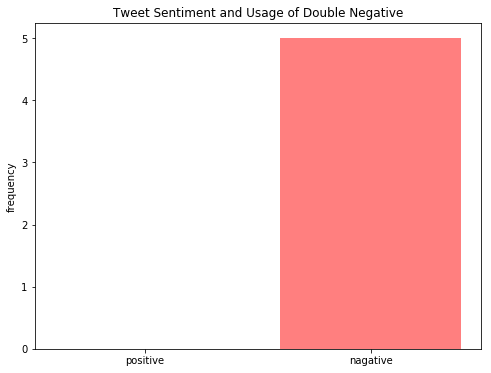

In [26]:
x = df1["Sentiment"][df1.is_double_negative == True]
y = []
z = []
for v in x:
    if(v == "positive"):
        y.append(v)
for v in x:
    if(v == "nagative"):
        z.append(v)
plt.figure(figsize=(8,6))
plt.ylabel('frequency')
obj = ("positive","nagative")
y_pos = np.arange(len(obj))
performance = [len(y),len(z)]
plt.bar(y_pos, performance, align='center', alpha=0.5, color = ["b","r"]) # display a bar chart showing co-relation between Tweet Sentiment and use of Double Negative
plt.xticks(y_pos, obj)
plt.title('Tweet Sentiment and Usage of Double Negative')

In [27]:
# Preparing data for Naive Bayes Classification

df2 = pd.DataFrame()
df2["tweets"] = df1["Tweets"]
df2["label"] = df1["is_double_negative"].apply(lambda x: 0 if x== False else 1)
totalRemoved = 0
for index, row in df2.iterrows():
    if (row['label'] == 0 and totalRemoved < (len(df1)-4*len(dnegative_tweets))):
        totalRemoved += 1
        df2 = df2.drop(index, inplace=False)
df2

,tweets,label
26,i would not stop saying this girl ain t no hai...,1
74,i would not stop saying this girl ain t no hai...,1
80,ain t no shordy on these bliccs,1
82,fuck mlk day i still have to work ain t no dam...,1
120,i used to say fuck the police now is say fuck ...,1
148,i dont like to self promote but none of my rec...,0
149,this town has been dumb to me from day 1 that ...,0
150,a question on jeopardy the other day was a pic...,0
151,none maxin is the winner,0
152,none but i like his songs when someone else is...,0


In [28]:
#Creating a Vector of word count
X_train, X_test, y_train, y_test = train_test_split(df2["tweets"], df2["label"], random_state=1)
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words="english")

#Split data into training and testing sets

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
tfidfconverter = TfidfTransformer()
X_test_cv = tfidfconverter.fit_transform(X_test_cv).toarray()
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)
top_words_df

,0
t,5
say,3
playing,3
sain,2
like,2
statistical,2
cricket,2
stop,2
s,2
tall,2


In [29]:
# Performing prediction

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [30]:
# Displaying the accuracy of the prediction

print("Accuracy score: ", accuracy_score(y_test, predictions))
try:
    print("Precision score: ", precision_score(y_test, predictions))
    print("Recall score: ", recall_score(y_test, predictions))
except:
    pass

Accuracy score:  0.8
Precision score:  1.0
Recall score:  0.5


Text(91.68,0.5,'predicted label')

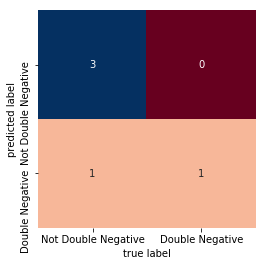

In [31]:
# Plotting the confusion matrix of accuracy, precision and recall

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap="RdBu", cbar=False,
xticklabels=["Not Double Negative", "Double Negative"], yticklabels=["Not Double Negative", "Double Negative"])
plt.xlabel("true label")
plt.ylabel("predicted label")

In [32]:
# checking where the model missed, side-by-side comparison

testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append("Double Negative")
    else:
        testing_predictions.append("Not Double Negative")
check_df = pd.DataFrame({"actual_label": list(y_test), "prediction": testing_predictions, "abstract":list(X_test)})
check_df.replace(to_replace=0, value="Not Double Negative", inplace=True)
check_df.replace(to_replace=1, value="Double Negative", inplace=True)
check_df

,abstract,actual_label,prediction
0,fuck mlk day i still have to work ain t no dam...,Double Negative,Double Negative
1,hey transparency trust and responsibility are ...,Not Double Negative,Not Double Negative
2,this town has been dumb to me from day 1 that ...,Not Double Negative,Not Double Negative
3,sorry for the trouble uninstalling reinstallin...,Not Double Negative,Not Double Negative
4,ain t no shordy on these bliccs,Double Negative,Not Double Negative
